reading the file

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("train (1).csv",skipinitialspace=True)

In [3]:
df.head()


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


10 features and 1 target variable

target variable is given so it is a supervised learning problem

Target variavle contains the yes/no so its a classification probelm statement (binary)

In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

no null values

In [5]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [6]:
df=df.drop_duplicates()

In [7]:
df.shape

(45205, 11)

In [8]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


<Axes: >

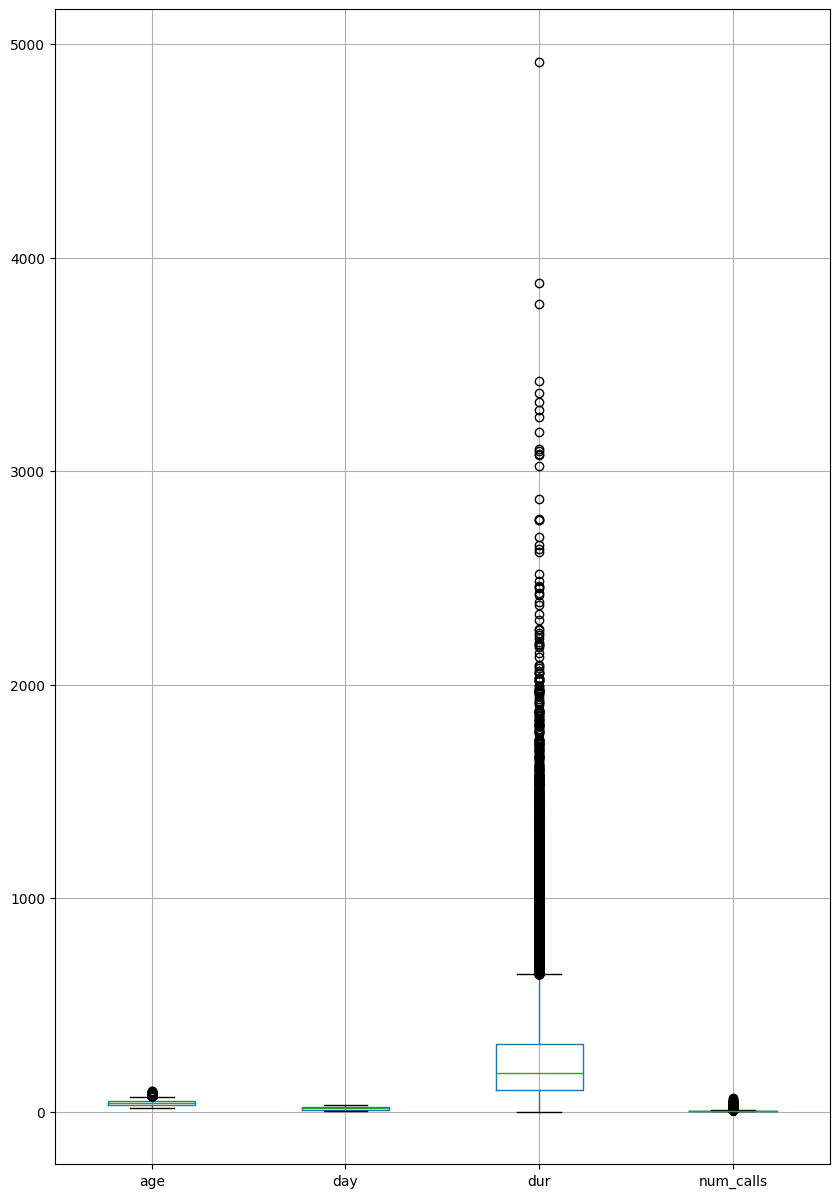

In [9]:
df.boxplot(column=['age','day','dur','num_calls'],figsize=(10,15))

Thus age,day,dur,num_calls having outliers so we need to remove because it may create a problems.

# Handling the outlier

**Age**

In [10]:
iqr=df['age'].quantile(0.75)-df['age'].quantile(0.25)
# print(iqr)
upper_thereshold=df['age'].quantile(0.75)+(1.5*iqr)
lower_thereshold=df['age'].quantile(0.25)-(1.5*iqr)

print(lower_thereshold,upper_thereshold)

10.5 70.5


we have outlier in the age column so we need to clip it by lower and upper thershold

In [11]:
# df.age=df.age.clip(10.5,70.5)

age column is clipped

**Day**

In [12]:
iqr=df['day'].quantile(0.75)-df['day'].quantile(0.25)
# print(iqr)
upper_thereshold=df['day'].quantile(0.75)+(1.5*iqr)
lower_thereshold=df['day'].quantile(0.25)-(1.5*iqr)

print(lower_thereshold,upper_thereshold)

-11.5 40.5


dont have any outlier in day column

**dur**

In [13]:
iqr=df['dur'].quantile(0.75)-df['dur'].quantile(0.25)
# print(iqr)
upper_thereshold=df['dur'].quantile(0.75)+(1.5*iqr)
lower_thereshold=df['dur'].quantile(0.25)-(1.5*iqr)

print(lower_thereshold,upper_thereshold)

-221.0 643.0


having outlier in dur column

In [14]:
df.dur=df.dur.clip(-221.0,643.0)

dur column is clipped with upper and lower threshold

**num_calls**

In [15]:
iqr=df['num_calls'].quantile(0.75)-df['num_calls'].quantile(0.25)
# print(iqr)
upper_thereshold=df['num_calls'].quantile(0.75)+(1.5*iqr)
lower_thereshold=df['num_calls'].quantile(0.25)-(1.5*iqr)

print(lower_thereshold,upper_thereshold)

-2.0 6.0


In [16]:
df.num_calls=df.num_calls.clip(-2.0,6.0)

In [17]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.00000,45205.000000
mean,40.937087,15.80688,234.95620,2.392235
std,10.619130,8.32234,176.75476,1.600152
min,18.000000,1.00000,0.00000,1.000000
25%,33.000000,8.00000,103.00000,1.000000
50%,39.000000,16.00000,180.00000,2.000000
75%,48.000000,21.00000,319.00000,3.000000
max,95.000000,31.00000,643.00000,6.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45205 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45205 non-null  int64 
 1   job             45205 non-null  object
 2   marital         45205 non-null  object
 3   education_qual  45205 non-null  object
 4   call_type       45205 non-null  object
 5   day             45205 non-null  int64 
 6   mon             45205 non-null  object
 7   dur             45205 non-null  int64 
 8   num_calls       45205 non-null  int64 
 9   prev_outcome    45205 non-null  object
 10  y               45205 non-null  object
dtypes: int64(4), object(7)
memory usage: 4.1+ MB


In [19]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,643,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,643,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [20]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

if any unknown values we need to fill

unknown is less we can go with mode.

In [21]:
df["job"].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [22]:
df["job"]=df["job"].replace("unknown",np.nan)

In [23]:
df["education_qual"].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [24]:
df["education_qual"]=df["education_qual"].replace("unknown",np.nan)

In [25]:
df["call_type"].value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

no use in impututation the unknown value  in call_type

In [26]:
df["mon"].value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

no unknown value

In [27]:
df["prev_outcome"].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [28]:
df.isnull().sum()

age                  0
job                288
marital              0
education_qual    1857
call_type            0
day                  0
mon                  0
dur                  0
num_calls            0
prev_outcome         0
y                    0
dtype: int64

In [29]:
df["education_qual"]=df["education_qual"].fillna("secondary")

In [30]:
df["education_qual"].value_counts()

secondary    25056
tertiary     13299
primary       6850
Name: education_qual, dtype: int64

In [31]:
df["job"]=df["job"].fillna("blue-collar")

In [32]:
df["job"].value_counts()


blue-collar      10018
management        9457
technician        7596
admin.            5170
services          4153
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [33]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

# Target column

encoding

In [34]:
df["y"].value_counts()

no     39916
yes     5289
Name: y, dtype: int64

[]

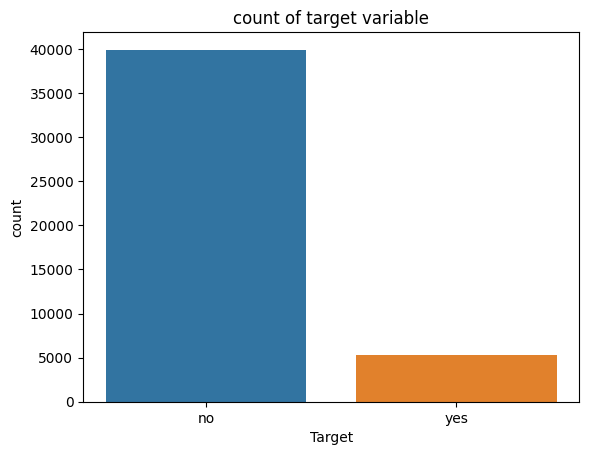

In [35]:
sns.countplot(x=df.y,data=df)
plt.xlabel("Target")
plt.title("count of target variable")
plt.plot()

In [36]:
df["prev_outcome"].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [37]:
df[df["prev_outcome"]=="success"].y.value_counts()

yes    978
no     533
Name: y, dtype: int64

In [38]:
df[df["prev_outcome"]=="failure"].y.value_counts()

no     4283
yes     618
Name: y, dtype: int64

In [39]:
import warnings
warnings.filterwarnings("ignore")

In [40]:
# values=["success","failure","other"]
# for i in values:
#   print("% of +ve conversation if prev_outcome",i,len(df[df["prev_outcome"]==i][df["y"]=="yes"])/len(df[df["prev_outcome"]=="success"])
#   print("over all yes % if prev_outcome",i,len(df[df["prev_outcome"]==i][df["y"]=="yes"])/len(df[df["y"]=="yes"]))

encoding for target variable

In [41]:
df["Target"]=df["y"].map({'yes': 1, 'no': 0})

# eda

In [42]:
df.groupby("prev_outcome")["Target"].mean()

prev_outcome
failure    0.126097
other      0.166848
success    0.647253
unknown    0.091630
Name: Target, dtype: float64

In [43]:
df.groupby("marital")["Target"].mean()

marital
divorced    0.119455
married     0.101250
single      0.149515
Name: Target, dtype: float64

In [44]:
df.groupby("education_qual")["Target"].mean()

education_qual
primary      0.086277
secondary    0.107838
tertiary     0.150086
Name: Target, dtype: float64

In [45]:
df.groupby("job")["Target"].mean()

job
admin.           0.122050
blue-collar      0.074067
entrepreneur     0.082717
housemaid        0.087903
management       0.137570
retired          0.227915
self-employed    0.118429
services         0.088851
student          0.286780
technician       0.110585
unemployed       0.155027
Name: Target, dtype: float64

In [46]:
df.groupby("mon")["Target"].mean()

mon
apr    0.196794
aug    0.110168
dec    0.467290
feb    0.166478
jan    0.101212
jul    0.090949
jun    0.102266
mar    0.519916
may    0.067199
nov    0.101511
oct    0.437669
sep    0.464594
Name: Target, dtype: float64

In [47]:
df.groupby("call_type")["Target"].mean()

call_type
cellular     0.149204
telephone    0.134205
unknown      0.040716
Name: Target, dtype: float64

distribution of feature

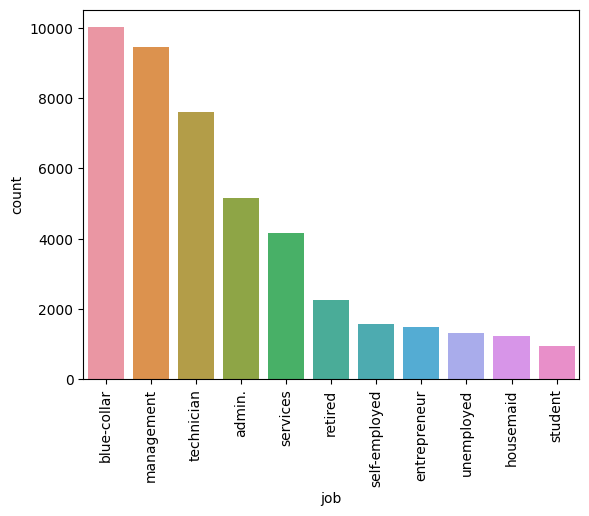

In [48]:
df_eda=pd.DataFrame(df.job.value_counts()).sort_values("job", ascending=False).reset_index()
df_eda.rename(columns={"index":"job","job":"count"},inplace=True)
bar=sns.barplot(x=df_eda["job"],y=df_eda["count"],data=df_eda)
bar.tick_params(axis="x",rotation=90)

<Axes: ylabel='job'>

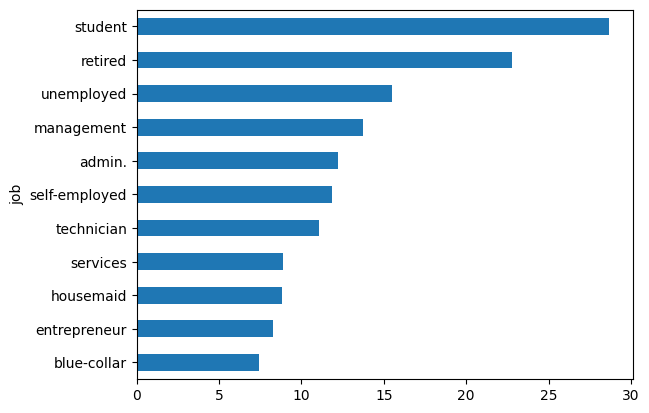

In [49]:
(df.groupby("job")["Target"].mean()*100).sort_values().plot(kind="barh")

In [50]:
df["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

<Axes: ylabel='education_qual'>

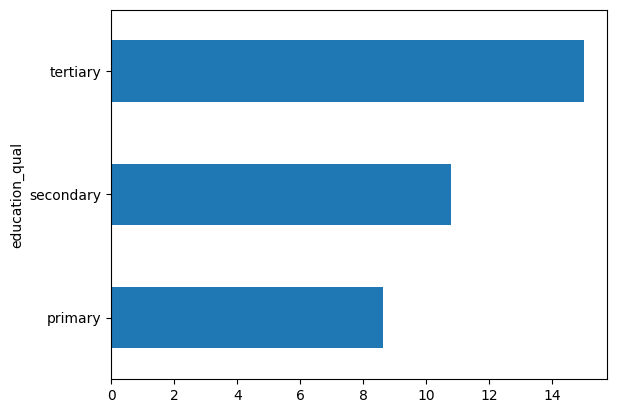

In [51]:
(df.groupby("education_qual")["Target"].mean()*100).sort_values().plot(kind="barh")

In [52]:
df["education_qual"].unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

<Axes: ylabel='marital'>

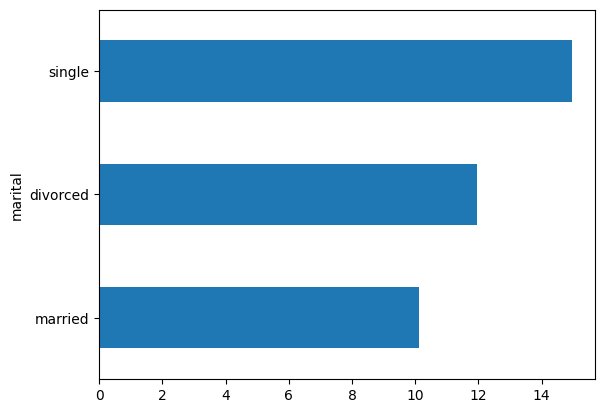

In [53]:
(df.groupby("marital")["Target"].mean()*100).sort_values().plot(kind="barh")

In [54]:
df["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

<Axes: ylabel='call_type'>

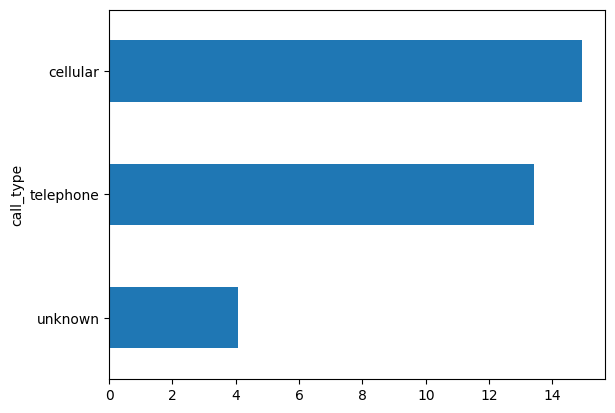

In [55]:
(df.groupby("call_type")["Target"].mean()*100).sort_values().plot(kind="barh")

<Axes: ylabel='mon'>

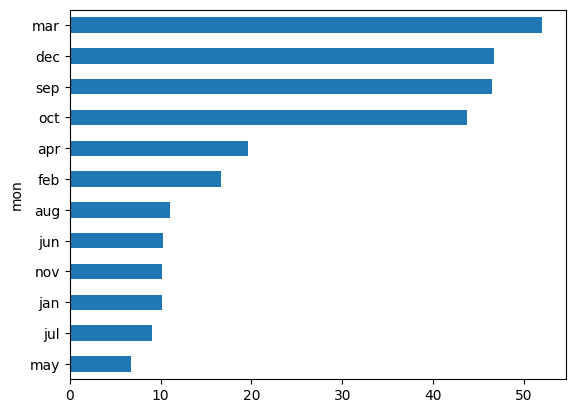

In [56]:
(df.groupby("mon")["Target"].mean()*100).sort_values().plot(kind="barh")

In [57]:
df["mon"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

<Axes: ylabel='marital'>

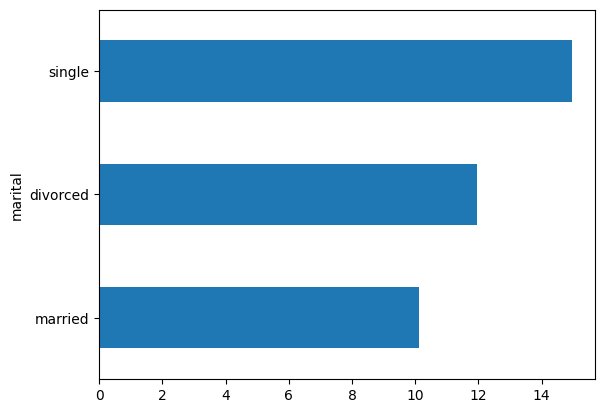

In [58]:
(df.groupby("marital")["Target"].mean()*100).sort_values().plot(kind="barh")

In [59]:
df["prev_outcome"].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

<Axes: ylabel='prev_outcome'>

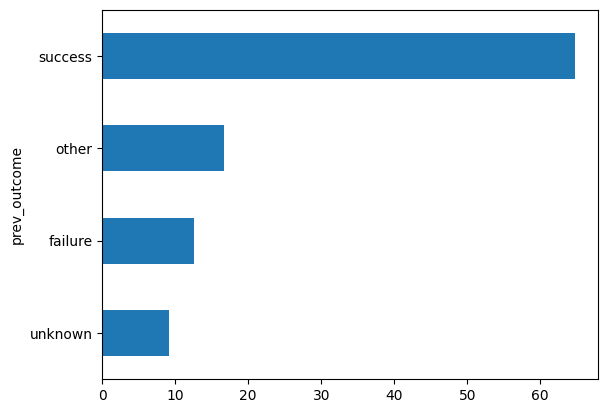

In [60]:
(df.groupby("prev_outcome")["Target"].mean()*100).sort_values().plot(kind="barh")

continuous features

<Axes: ylabel='day'>

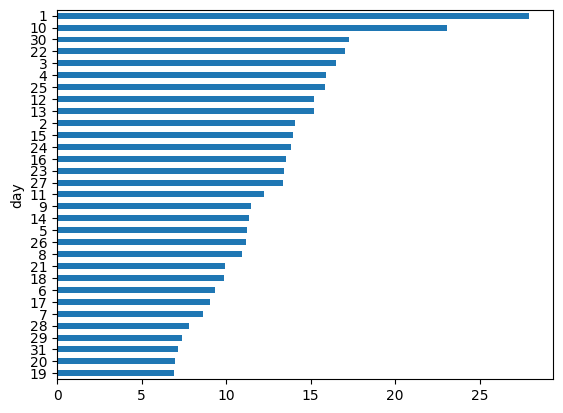

In [61]:
(df.groupby("day")["Target"].mean()*100).sort_values().plot(kind="barh")

In [62]:
df["day"].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

<Axes: ylabel='age'>

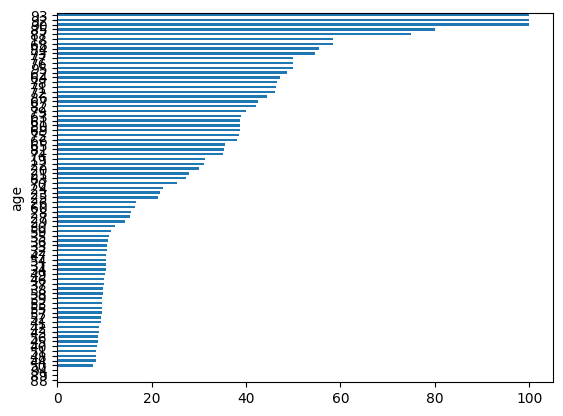

In [63]:
(df.groupby("age")["Target"].mean()*100).sort_values().plot(kind="barh")

<Axes: xlabel='y', ylabel='day'>

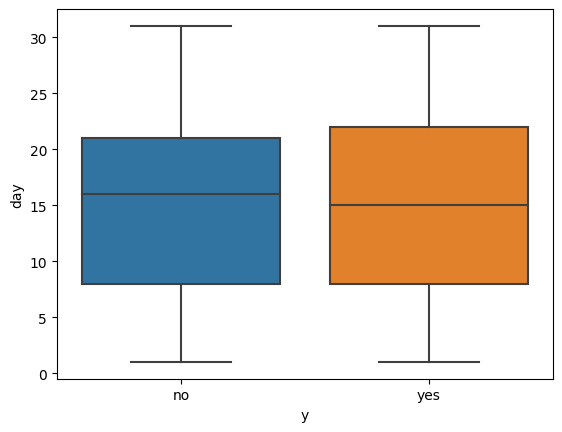

In [64]:
sns.boxplot(x='y',y='day',data=df)

In [65]:
df["age"]

0        58
1        44
2        33
3        47
4        33
         ..
45206    51
45207    71
45208    72
45209    57
45210    37
Name: age, Length: 45205, dtype: int64

In [66]:
df["y"]

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45205, dtype: object

In [67]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'Target'],
      dtype='object')

<Axes: xlabel='y', ylabel='age'>

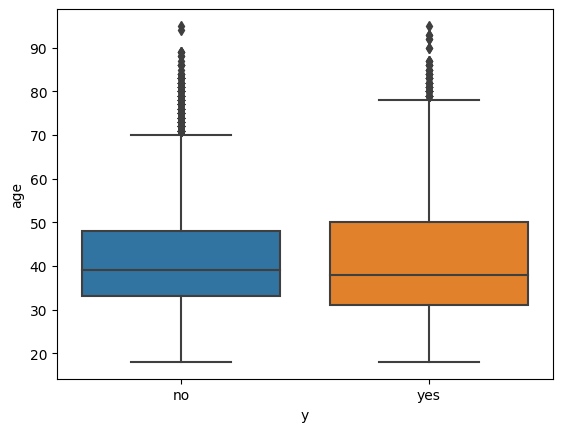

In [68]:
sns.boxplot(x='y',y='age',data=df)

<Axes: xlabel='y', ylabel='dur'>

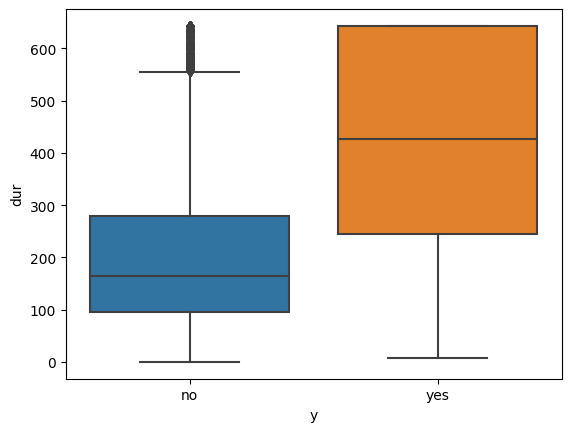

In [69]:
sns.boxplot(x='y',y='dur',data=df)

<Axes: xlabel='y', ylabel='num_calls'>

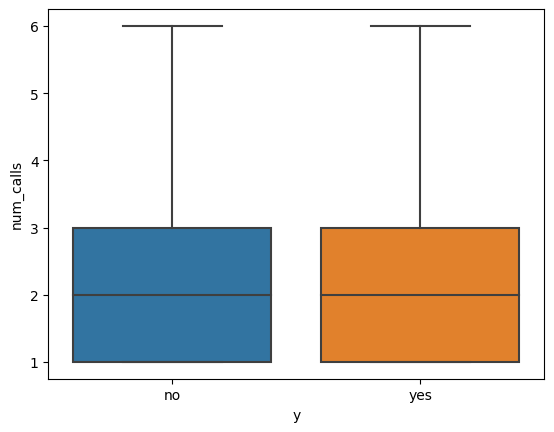

In [70]:
sns.boxplot(x='y',y='num_calls',data=df)

In [71]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,Target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0
3,47,blue-collar,married,secondary,unknown,5,may,92,1,unknown,no,0
4,33,blue-collar,single,secondary,unknown,5,may,198,1,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,643,3,unknown,yes,1
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes,1
45208,72,retired,married,secondary,cellular,17,nov,643,5,success,yes,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no,0


In [72]:
df=df.drop(["y"],axis=1)

#Encoding

In [73]:
# encoding
df["job"]=df.job.map({'blue-collar': 1, 'entrepreneur': 2,'housemaid': 3,'services': 4,'technician': 5,'self-employed': 6,'admin.': 7,'management': 8,'unemployed': 9,'retired': 10,'student': 11})


In [74]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Target
0,58,8,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,5,single,secondary,unknown,5,may,151,1,unknown,0
2,33,2,married,secondary,unknown,5,may,76,1,unknown,0
3,47,1,married,secondary,unknown,5,may,92,1,unknown,0
4,33,1,single,secondary,unknown,5,may,198,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,5,married,tertiary,cellular,17,nov,643,3,unknown,1
45207,71,10,divorced,primary,cellular,17,nov,456,2,unknown,1
45208,72,10,married,secondary,cellular,17,nov,643,5,success,1
45209,57,1,married,secondary,telephone,17,nov,508,4,unknown,0


In [75]:
df["job"].unique()

array([ 8,  5,  2,  1, 10,  7,  4,  6,  9,  3, 11])

In [76]:
df["education_qual"]=df["education_qual"].map({'primary': 1, 'secondary': 2,'tertiary': 3})

In [77]:
df["education_qual"].unique()

array([3, 2, 1])

In [78]:
df["marital"]=df["marital"].map({'married': 1, 'divorced': 2,'single': 3})

In [79]:
df["marital"].unique()

array([1, 3, 2])

In [80]:
df["call_type"]=df["call_type"].map({'unknown': 1, 'telephone': 2,'cellular': 3})

In [81]:
df["call_type"].unique()

array([1, 3, 2])

In [82]:
df["mon"]=df.mon.map({'may': 1, 'jul': 2,'jan': 3,'nov': 4,'jun': 5,'aug': 6,'feb': 7,'apr': 8,'oct': 9,'sep': 10,'dec': 11,'mar': 12})


In [83]:
df["mon"].unique()

array([ 1,  5,  2,  6,  9,  4, 11,  3,  7, 12,  8, 10])

In [84]:
df["prev_outcome"]=df["prev_outcome"].map({'unknown': 1, 'failure': 2,'other': 3,'success': 4})

In [85]:
df["prev_outcome"].unique()

array([1, 2, 3, 4])

In [86]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Target
0,58,8,1,3,1,5,1,261,1,1,0
1,44,5,3,2,1,5,1,151,1,1,0
2,33,2,1,2,1,5,1,76,1,1,0
3,47,1,1,2,1,5,1,92,1,1,0
4,33,1,3,2,1,5,1,198,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,5,1,3,3,17,4,643,3,1,1
45207,71,10,2,1,3,17,4,456,2,1,1
45208,72,10,1,2,3,17,4,643,5,4,1
45209,57,1,1,2,2,17,4,508,4,1,0


In [87]:
# df=df.drop(["y"],axis=1)

# splitting the data

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X =  df.loc[:,['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon','dur', 'num_calls', 'prev_outcome']].values
y = df.loc[:,'Target'].values


In [90]:
df.Target.value_counts()

0    39916
1     5289
Name: Target, dtype: int64

In [91]:
# X = df[['age', 'job', 'marital','education_qual', 'call_type', 'day', 'mon','dur', 'num_calls', 'prev_outcome']]
# y = df['Target']# target
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
     

In [92]:
df.shape

(45205, 11)

# SMOTEENN to balance the imbalance data

In [93]:
from imblearn.combine import SMOTEENN
smt=SMOTEENN(sampling_strategy="all")
X_smt,y_smt=smt.fit_resample(X,y)

In [94]:
X_smt.shape

(67189, 10)

In [95]:
y_smt.shape

(67189,)

In [96]:
df.Target.value_counts()

0    39916
1     5289
Name: Target, dtype: int64

In [97]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Model

In [98]:
import matplotlib.pyplot as plt 

# **LogisticRegression**

In [99]:
from sklearn.metrics import accuracy_score,roc_curve, roc_auc_score, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score

In [100]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() # initialise the model, ready to be used
log_reg.fit(X_smt,y_smt)
# log_reg.score(X_train_scaled,y_test)

LogisticRegression()

In [101]:
y_pred_lg=log_reg.predict(X_test)

In [102]:
log_auc_roc_score=roc_auc_score(y_test,y_pred_lg)
log_auc_roc_score

0.7846446550119803

# KNeighborsClassifier

In [103]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_smt,y_smt)

KNeighborsClassifier(n_neighbors=3)

In [104]:
y_pred_KNN=KNN.predict(X_test)

In [105]:
KNN_auc_roc_score=roc_auc_score(y_test,y_pred_KNN)
KNN_auc_roc_score

0.8924302272011713

# DecisionTreeClassifier

In [106]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(X_smt,y_smt)

y_pred_dt = dt.predict(X_test)
y_pred_dt

array([0, 0, 1, ..., 0, 0, 0])

In [107]:
score=roc_auc_score(y_test,y_pred_dt)
score

0.93111488287697

In [108]:
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
# import numpy as np

# for depth in [1,2,3,4,5,6,7,8,9,10,20]:
#   dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
#   # Fit dt to the training set
#   dt.fit(X_train, y_train) # the model is trained
#   trainAccuracy = accuracy_score(y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
#   dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
#   valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
#   print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

In [121]:
for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) 
  dt.fit(X_train,y_train)
  trainAccuracy = accuracy_score(y_test,dt.predict(X_test))
  valAccuracy = cross_val_score(dt,X_smt,y_smt, cv=10)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.8812078309921468  Cross val score :  0.7818396494041571
Depth  :  2  Training Accuracy :  0.8913836964937507  Cross val score :  0.7665993039782099
Depth  :  3  Training Accuracy :  0.9001216679570844  Cross val score :  0.8237801374719023
Depth  :  4  Training Accuracy :  0.9033292777347639  Cross val score :  0.7917518785955376
Depth  :  5  Training Accuracy :  0.9028868487999115  Cross val score :  0.7996547871758055
Depth  :  6  Training Accuracy :  0.902333812631346  Cross val score :  0.8152674599068348
Depth  :  7  Training Accuracy :  0.9037717066696161  Cross val score :  0.8058018121308314
Depth  :  8  Training Accuracy :  0.9008959185930759  Cross val score :  0.8326660130006834
Depth  :  9  Training Accuracy :  0.8999004534896582  Cross val score :  0.8220990640264633
Depth  :  10  Training Accuracy :  0.8985731666851012  Cross val score :  0.8116209532484673
Depth  :  20  Training Accuracy :  0.8788850790841721  Cross val score :  0.8414

In [122]:
y_pred_dt=dt.predict(X_test)

In [114]:
score=roc_auc_score(y_test,y_pred_dt)
score

0.93111488287697

In [115]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,max_depth=5,max_features="sqrt")
rf.fit(X_smt,y_smt)

RandomForestClassifier(max_depth=5)

In [116]:
y_pred_rf=rf.predict(X_test)

In [117]:
rf_auc_roc_score=roc_auc_score(y_test,y_pred_rf)
rf_auc_roc_score

0.8172444457222168

# voting_classifier

In [127]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [128]:
m1=LogisticRegression()
m2=KNeighborsClassifier(n_neighbors=3)
m3=DecisionTreeClassifier()
m4=RandomForestClassifier(n_estimators=100,max_depth=5,max_features="sqrt")
m5=XGBClassifier(learning_rate=0.5,n_estimators=100,verbosity=0)

In [129]:
voting_classifier=VotingClassifier(estimators=[("lr",m1),("dt",m2),("KNN",m3),("xgb",m4),("rf",m5)],voting="soft")
voting_classifier.fit(X_smt,y_smt)
y_pred=voting_classifier.predict(X_test)
voting_classifier_auc_roc_score=roc_auc_score(y_test,y_pred)
voting_classifier_auc_roc_score

0.9172827438322747

XGBOOST

In [130]:
from xgboost import XGBClassifier
xg = XGBClassifier(learning_rate=0.5,n_estimators=100,verbosity=0)
xg.fit(X_smt,y_smt)
test_pred = xg.predict(X_test)
XG_auc_roc_score = roc_auc_score(y_test, test_pred)
print("Performance of auroc test : ", XG_auc_roc_score)

Performance of auroc test :  0.9171345534033662


In [133]:
result=pd.DataFrame({"MODEL_RESULTS":["LogisticRegression","KNN","DecisionTree","RandomForest","XGBClassifier"],"AUROC_VALUES":[log_auc_roc_score,KNN_auc_roc_score,score,rf_auc_roc_score,XG_auc_roc_score]})

In [134]:
result

,MODEL_RESULTS,AUROC_VALUES
0,LogisticRegression,0.784645
1,KNN,0.892430
2,DecisionTree,0.931115
3,RandomForest,0.817244
4,XGBClassifier,0.917135


# feature importance

[(0.032872014, 'age'),
 (0.042459406, 'job'),
 (0.022630194, 'marital'),
 (0.020278515, 'education_qual'),
 (0.32426894, 'call_type'),
 (0.045607924, 'day'),
 (0.14301574, 'mon'),
 (0.16909982, 'dur'),
 (0.07079616, 'num_calls'),
 (0.12897126, 'prev_outcome')]

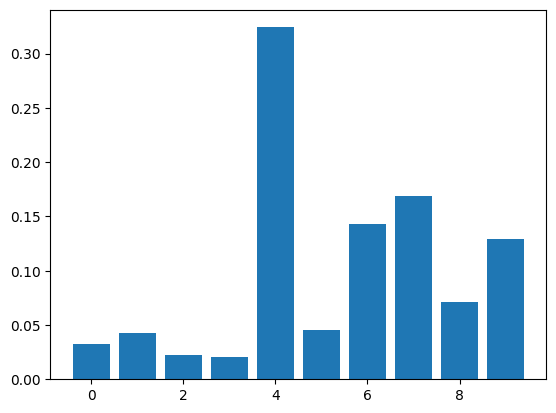

In [135]:
xg.fit(X_smt,y_smt)
importance = xg.feature_importances_
plt.bar([x for x in range(len(importance))], importance)
list(zip(importance,df.columns))

from the above top important features are:

1.call_type column has tha high importance

2.prev_outcome

3.dur

4.mon



Thus XGBoost gives the highest roc_auc_score

conclusion most of the insurance are claimed based on the call types through commmunication via phones ,prev_outcome, on may mon,based on duration of the call.